# Isolation Forest

In this notebook, we show how to use Scikit-Learn's Isolation Forest model to perform anomaly detection on a two-dimensional toy dataset.

The use Scikit-Learn's Isolation Forest model for a practical problem can be found in the following notebook.

https://github.com/rhasanbd/Anomaly-Detection-LOF-IsolationForest-FactMCD-GMM/blob/master/Anomaly%20Detection-LOF-IsolationForest-FastMCD-GMM.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

## Create a 2D Toy Dataset

In this dataset, we have two dense groups of 2D samples and a set of low-density samples or anomalies. Our goal is to see whether the IsolationForest model can identify the anomalous samples. 

In [2]:
# Create a seed for generating random numbers
rng = np.random.RandomState(42)

# Generate a set of 2D normal data points as two dense groups 
X_normal = 0.2 * rng.randn(1000, 2)
X_normal = np.r_[X_normal + 3, X_normal]

# Generate a set of 2D outlier data points
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))

# Concatenate "normal" and "outlier" samples
X = np.r_[X_normal, X_outliers]

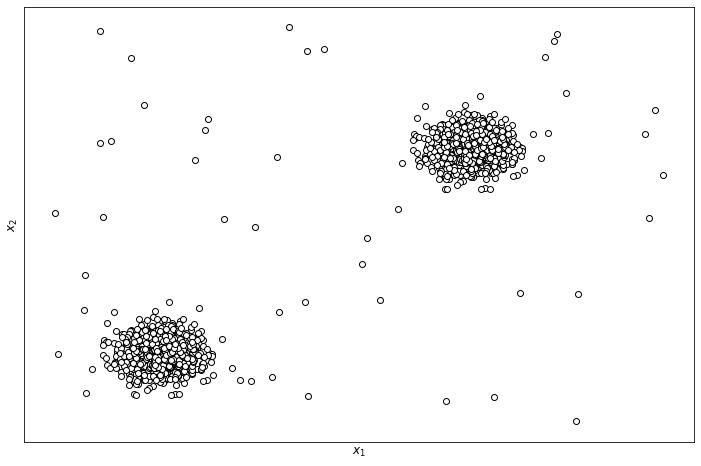

In [3]:
# Create a scatter plot for the 2D data
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1], c="white", edgecolor='k', marker='o')
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", rotation=90, fontsize=12)
plt.xticks([])
plt.yticks([])
plt.show()

## Isolation Forest

We use Scikit-Learn's IsolationForest model for performing anomaly detection. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest.decision_function


We need to set the following hyperparameters.


- n_estimators int, default=100
The number of base estimators in the ensemble.


- max_samples “auto”, int or float, default=”auto”
The number of samples to draw from X to train each base estimator.


- contamination ‘auto’ or float, default=’auto’
The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples.

    -- If ‘auto’, the threshold is determined as in the original paper.

    -- If float, the contamination should be in the range (0, 0.5].


- random_state int, RandomState instance or None, default=None
Controls the pseudo-randomness of the selection of the feature and split values for each branching step and each tree in the forest.

    -- Pass an int for reproducible results across multiple function calls. See Glossary.

- verbose int, default=0
Controls the verbosity of the tree building process.


### Methods

Following two IsolationForest methods are useful.

- predict(X)

        Predict if a particular sample is an outlier or not.
        
The "predict" method generates labels for each data point.

    +1: inlier
    -1: outlier

- score_samples(X)

        Opposite of the anomaly score defined in the original paper.
        
        
## Train the Isoloation Forest Model

In [4]:
# Train the model
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=rng, verbose=1)
clf.fit(X)

# Generate labels for each data point (+1 inlier & -1 outlier).
y_pred = clf.predict(X)


# Display some predicted labels
print(y_pred[0:50])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


## Create a Set of Inlier (Normal) & Outlier Samples

Based on the predicted labels, we create two arrays.
- Inlier (normal samples)
- Outlier

In [5]:
normal = []
outliers = []

for i in range(len(y_pred)):
    if(y_pred[i] == 1):
        normal.append(X[i])
    else:
        outliers.append(X[i])
  

# Convert the lists into numpy arrays
normal = np.asarray(normal)
outliers = np.asarray(outliers)

## Display the Inliers (Blue) and Outliers (Red) on a Scatter Plot

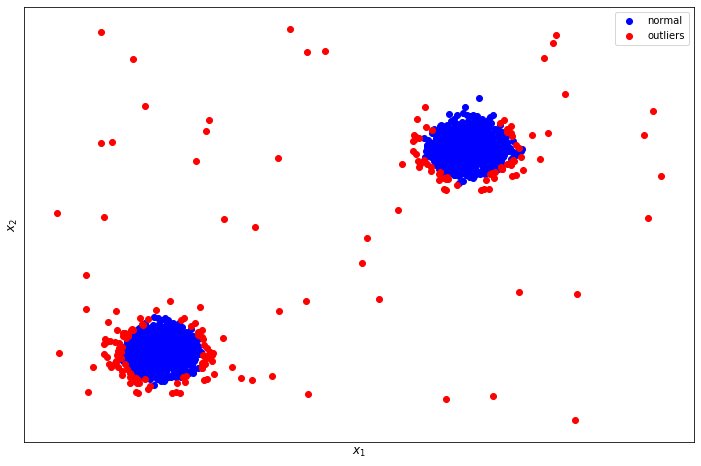

In [6]:
plt.figure(figsize = (12, 8))
plt.scatter(normal[:, 0], normal[:, 1], c="b", marker='o', label="normal")
plt.scatter(outliers[:, 0], outliers[:, 1], c="r", marker='o', label="outliers")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", rotation=90, fontsize=12)
plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()